# Visão Geral de Expressões Regulares

Se você já trabalhou com Python, especialmente nas áreas de ciência de dados, aprendizado de máquina, modelagem de linguagem e engenharia de dados, é bem provável que já tenha se deparado com expressões regulares.

**Expressões regulares** são uma ferramenta poderosa para correspondência de padrões em dados de texto. Elas são universalmente suportadas em centenas de plataformas, dentro e fora do Python. Se você já usou wildcards para correspondência de texto, pense neles como wildcards turbinados. Com apenas algumas horas de aprendizado e uso e prática consistentes, você pode aproveitar essa poderosa convenção para converter texto. No processamento de linguagem natural, as expressões regulares são especialmente importantes para a tokenização de dados e sua limpeza. No entanto, elas podem ser usadas para tarefas simples, porém tediosas, como localizar e substituir texto ou dividir texto em separadores incomuns. Outras linguagens de programação, como Java, Go, R, C#, C++ e SQL, suportam expressões regulares, o que lhes confere utilidade adicional.

Desde fornecer uma melhor *busca e substituição* até remover tokens indesejados, expressões regulares são uma habilidade que você pode usar todos os dias para superar as tarefas mais desafiadoras de processamento de texto. Se você costuma escanear documentos manualmente ou analisar substrings apenas para identificar padrões de texto, talvez queira experimentá-las!

Veja isso. Neste notebook, vá em *Editar -> Localizar e Substituir* e você verá um botão discreto que permite pesquisar em um notebook usando expressões regulares. Podemos pesquisar as palavras "Real" e "Realidade" neste documento usando uma única expressão regular `Real(idade)?`.

![](media/3dLWAqeB.png)

Você também encontrará essa opção de expressão regular para *busca e substituição* na maioria dos editores de texto de código, como Visual Studio Code, Notepad++, eMacs, Vim e PyCharm. Você encontrará suporte para elas em outras ferramentas de análise de dados, como Alteryx, Tableau e LibreOffice.

## Um Exemplo Motivacional

Pense em expressões regulares como uma minilinguagem de programação dentro das linguagens de programação. O Python possui suporte a expressões regulares integrado em sua biblioteca padrão usando o pacote `re`.

In [ ]:
import re 

Vamos fazer uma verificação de correspondência simples. Suponha que quiséssemos corresponder apenas às strings "Real" e "Realidade". Em vez de escrever um monte de código inflexível e confuso para substrings, podemos ter uma expressão regular `Real(idade)?` para isso.

In [ ]:
if re.fullmatch(pattern="Real(idade)?", string="Real"): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

Não se preocupe se você não entender a sintaxe `pattern`. Aprenderemos tudo sobre a sintaxe de padrões de expressões regulares neste curso.

Podemos omitir as palavras-chave `pattern` e `string`, pois são os dois primeiros argumentos.

In [ ]:
if re.fullmatch("Real(idade)?","Real"): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

Obviamente, isso não corresponderá a "Realização" porque não corresponde à nossa expressão regular.

In [ ]:
if re.fullmatch(pattern="Real(idade)?", string="Realização"): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

Nem corresponderá a uma letra minúscula, já que isso também não está na expressão regular.

In [ ]:
if re.fullmatch(pattern="Real(idade)?", string="real"): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

Agora, poderíamos desenvolver uma expressão regular para permitir que o "R" seja maiúsculo ou minúsculo, bem como corresponder a "Realização".

In [ ]:
if re.fullmatch(pattern="[Rr]eal(idade|ização)?", string="realização"): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

Ou poderíamos simplesmente usar o parâmetro `flags` e instruí-lo a ignorar completamente a diferenciação de maiúsculas e minúsculas usando `IGNORECASE`. Também podemos encontrar qualquer palavra que comece com "real".

In [ ]:
if re.fullmatch(pattern="real.*", string="Realização", flags=re.IGNORECASE): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")

O módulo `re` suporta [diversas flags](https://docs.python.org/3/library/re.html#flags), e elas podem ser úteis. No entanto, a expressão regular faz a maior parte do trabalho pesado de controle do padrão. Mesmo assim, vale a pena dar uma olhada nelas e as usaremos conforme necessário.

Espero que isso lhe dê uma pequena amostra do que as expressões regulares podem fazer. Embora a sintaxe possa parecer estranha para você agora, você percebe o quão pouco código digitamos e conseguimos adaptar os padrões rapidamente? Imagine tentar usar substrings em Python, algo que você já deve ter feito no passado!

![Fonte: [XKCD.com](https://xkcd.com/208/)](attachment:translated_image_pt.png)
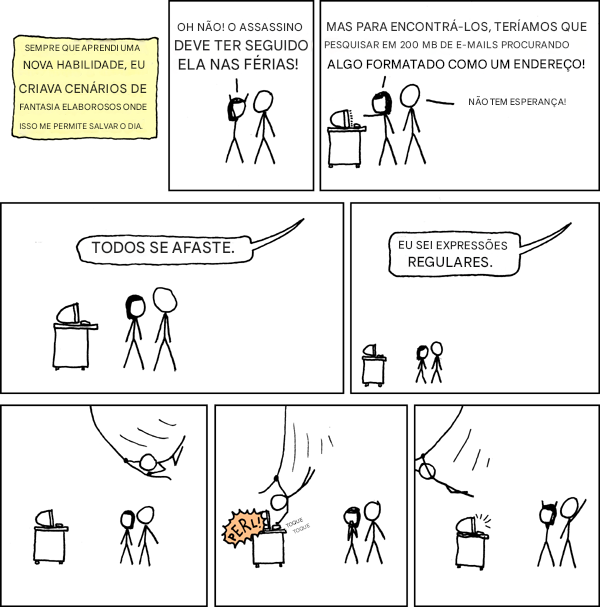

[Fonte: XKCD.com](https://xkcd.com/208/)

## Casos de Uso

Então, quais são os casos de uso para expressões regulares? Existem muitos. Aqui estão apenas alguns exemplos.

* Validar uma entrada de formulário do usuário, como a correspondência do formato de endereço de e-mail ou número de telefone

* Pesquisar dumps SQL para definições de tabela

* Encontrar e substituir código obsoleto com determinadas convenções de nomenclatura

* Criar tokenizadores personalizados para modelos de linguagem e aprendizado de máquina

* Remover números de previdência social, números de cartão de crédito e outras informações confidenciais de documentos


Há muita versatilidade. Aqui está um exemplo do mundo real. Preciso pesquisar em um documento todas as variantes de um produto, um microchip chamado [Atmega32U4](https://www.digikey.com/en/products/filter/microcontrollers/685?s=N4IgTCBcDaIIIBUCyBRA4nAzGAqgFhAF0BfIA). Mas, nossa, existem tantas variantes!

* Atmega32u4

* Atmega16u4

* Atmega32u4-AUR

* Atmega32u4RC-AUR

* Atmega16u4-AUR

* Atmega32u4-AU

* Atmega32u4RC-AU

* Atmega16u4-AU

* Atmega32u4-MU

* Atmega32u4RC-MU

* Atmega16u4-MU

Tentar criar um código *se-então* para corresponder a essas variantes de produto parece terrível. É um pesadelo. Felizmente, podemos ter uma expressão regular para nos salvar. O padrão de expressão regular abaixo corresponderá a todos esses códigos de produto e não a mais nada.

```
atmega(16|32)u4(rc)?(-[AM][MU]R?)?
```

Observe abaixo que testamos cada um desses códigos de produto. Também inserimos um código de produto fictício "Atmega17u4-MU", que não deve ser qualificado, pois não existe. Observe como todos eles correspondem, exceto o produto inventado.


In [ ]:
model_nums = ["Atmega32u4","Atmega16u4","Atmega32u4-AUR","Atmega32u4RC-AUR",
              "Atmega16u4-AUR","Atmega32u4-AU","Atmega32u4RC-AU","Atmega16u4-AU",
              "Atmega32u4-MU","Atmega32u4RC-MU","Atmega16u4-MU", "Atmega17u4-MU"]

for model_num in model_nums: 
    if re.fullmatch(pattern="atmega(16|32)u4(rc)?(-[AM][MU]R?)?", string=model_num, flags=re.IGNORECASE): 
        print(f"{model_num} -> Correspondeu!")
    else: 
        print(f"{model_num} -> Não Correspondeu!")

Há uma fraqueza nessa expressão regular. Ela permitirá que o "16" seja anexado a outros padrões aos quais nunca pertenceu. Por exemplo, não temos um `Atmega16u4RC-MU` em nossa lista original de produtos e isso resultará em uma correspondência. Mas, para nossos propósitos, isso é aceitável. Certamente podemos tornar a expressão regular mais complexa para capturar isso, mas para nossos propósitos, isso é aceitável. Isso nos leva à regra de ouro das expressões regulares: FAÇA UMA REGEX COMPLEXA E ESPECÍFICA O SUFICIENTE PARA REALIZAR SUA TAREFA.

## Conclusão

Espero que isso tenha te motivado e animado para aprender expressões regulares. Elas serão úteis em sua carreira e podem ser usadas diariamente, mesmo em tarefas simples como processamento de texto. O recurso *Localizar e Substituir* nunca mais será o mesmo para você. Mas, à medida que avançamos neste curso, você não apenas aprenderá a construir expressões regulares para atender às suas necessidades específicas de padrões de texto, mas também aprenderá algumas bibliotecas e exemplos do mundo real.

Observe que expressões regulares podem adicionar um pouco de sobrecarga à sua computação. Mas os computadores são tão rápidos hoje em dia e, para a maioria das tarefas cotidianas, eles valem o custo computacional que você provavelmente não notará. Dito isso, você provavelmente deve ter cuidado ao usar expressões regulares em escalas de big data e observar que elas podem tornar os pipelines de dados mais lentos. Se você se deparar com isso, poderá encontrar oportunidades para otimizar e projetar uma compilação ou implementação melhor.

## Exercício

Complete o código abaixo substituindo os pontos de interrogação para corresponder à expressão regular `[A-Z]{3}` em relação à string `DFW`.

In [ ]:
import ? 

if ?.fullmatch(?, ?, flags=re.IGNORECASE): 
    print("Match!")
else: 
    print("No match!") 

### RESPOSTA A BAIXO

|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

In [ ]:
import re

if re.fullmatch(pattern="[A-Z]{3}", string="DFW", flags=re.IGNORECASE): 
    print("Correspondeu!")
else: 
    print("Não Correspondeu!")